# 探索的データ分析
- 行数、列数の確認
- データ型の確認
- 前処理
- 簡易な予測

In [70]:
# ライブラリ読み込み

In [71]:
import pandas as pd
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, VBar, HoverTool

In [72]:
output_notebook()

Loading BokehJS ...

In [73]:
# dataframe設定調整

In [157]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [75]:
# データ読み込み

In [76]:
train = pd.read_csv('../../data/rawdata/application_train.csv')

In [77]:
# 概要

In [78]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [79]:
f"行:{len(train)} / 列:{len(train.columns)}"

'行:307511 / 列:122'

In [80]:
train.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [81]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [173]:
for c in train.columns:
    print(f'{c}  数:{train[c].isnull().sum()} / 割合:{train[c].isnull().sum() / len(train) * 100:0.4f}%')

SK_ID_CURR  数:0 / 割合:0.0000%
TARGET  数:0 / 割合:0.0000%
NAME_CONTRACT_TYPE  数:0 / 割合:0.0000%
CODE_GENDER  数:0 / 割合:0.0000%
FLAG_OWN_CAR  数:0 / 割合:0.0000%
FLAG_OWN_REALTY  数:0 / 割合:0.0000%
CNT_CHILDREN  数:0 / 割合:0.0000%
AMT_INCOME_TOTAL  数:0 / 割合:0.0000%
AMT_CREDIT  数:0 / 割合:0.0000%
AMT_ANNUITY  数:12 / 割合:0.0039%
AMT_GOODS_PRICE  数:278 / 割合:0.0904%
NAME_TYPE_SUITE  数:1292 / 割合:0.4201%
NAME_INCOME_TYPE  数:0 / 割合:0.0000%
NAME_EDUCATION_TYPE  数:0 / 割合:0.0000%
NAME_FAMILY_STATUS  数:0 / 割合:0.0000%
NAME_HOUSING_TYPE  数:0 / 割合:0.0000%
REGION_POPULATION_RELATIVE  数:0 / 割合:0.0000%
DAYS_BIRTH  数:0 / 割合:0.0000%
DAYS_EMPLOYED  数:0 / 割合:0.0000%
DAYS_REGISTRATION  数:0 / 割合:0.0000%
DAYS_ID_PUBLISH  数:0 / 割合:0.0000%
OWN_CAR_AGE  数:202929 / 割合:65.9908%
FLAG_MOBIL  数:0 / 割合:0.0000%
FLAG_EMP_PHONE  数:0 / 割合:0.0000%
FLAG_WORK_PHONE  数:0 / 割合:0.0000%
FLAG_CONT_MOBILE  数:0 / 割合:0.0000%
FLAG_PHONE  数:0 / 割合:0.0000%
FLAG_EMAIL  数:0 / 割合:0.0000%
OCCUPATION_TYPE  数:96391 / 割合:31.3455%
CNT_FAM_MEMBERS  数:2 / 割合:0.0

### 可視化

In [191]:
# バーチャート
def plot_bar_chart(series, title, width=1000):
    items = dict(series.value_counts())
    keys = list(items.keys())
    values = list(items.values())
    source = ColumnDataSource(data=dict(
    x=keys,
    y=values,
    ))
    TOOLTIPS = [
    ("列名", "@x"),
    ("カウント", "@y"),
    ]
    p = figure(plot_width=width, plot_height=400, x_range=keys, title=title,
               toolbar_location=None, tooltips=TOOLTIPS, tools="")
    glyph = VBar(x="x", top="y", width=0.9)
    p.add_glyph(source, glyph)
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    show(p)

In [192]:
# ヒストグラム
def plot_histogram(series, title, width=1000):
    p = figure(plot_width=width, plot_height=400, title=title, toolbar_location=None, tools="")
    hist, edges = np.histogram(series, density=True, bins=30)
    p.quad(
        top=hist,
        bottom=0,
        left=edges[:-1],
        right=edges[1:],
        fill_color="navy",
        alpha=0.2
    )
    p.y_range.start = 0
    show(p)

In [193]:
# ラインチャート
def plot_line_chart(dataframe, col_name, date_name, title):
    grouped = dataframe.groupby(pd.Grouper(key=date_name, freq='D')).agg(['count'])
    source = ColumnDataSource(grouped)
    hover_tool = HoverTool(
        tooltips=[
            ("件数", f"@{col_name}"),
            ("日時", "@date_name{%F}"), # 'date'フィールドを'%Y-%m-%d %H:%M'でフォーマット
        ],
        formatters={
            f'{date_name}': 'datetime', # 'data'フィールドを'datetime'フォーマットにする
        },
        mode='mouse'
    )
    p = figure(plot_width=1000, x_axis_type='datetime', toolbar_location=None, tools=[hover_tool])
    p.line(x=col_name, y=date_name, source=source, legend_label=title)
    p.yaxis.axis_label = '件数'
    show(p)

In [194]:
# 列ごとにグラフを出力する。欠損値は「-999」で補完する
for c in train.columns:
    series = train[c].copy()
    if series.dtype == 'int64' or series.dtype == 'float64':
        series.fillna(-999, inplace=True)
        plot_histogram(series, c)
    else:
        series.fillna('-999', inplace=True)
        plot_bar_chart(series, c)
#     print(series.value_counts())

In [13]:
# pycaret予測

In [195]:
# ライブラリ読み込み
from pycaret.classification import *

In [149]:
# pycaretセットアップ
exp = setup(data=train,
            target='TARGET',
            session_id=123,
#             normalize = True, 
#             transformation = True, 
#             ignore_low_variance = True,
#             remove_multicollinearity = True,
#             multicollinearity_threshold = 0.95,
            ignore_features = ['SK_ID_CURR'],
            log_experiment = True,
            experiment_name = 'credit1', 
            n_jobs=-1,
            silent=True)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(307511, 122)"
5,Missing Values,True
6,Numeric Features,62
7,Categorical Features,58
8,Ordinal Features,False
9,High Cardinality Features,False


In [151]:
models = compare_models(include=['lr', 'dt', 'rf', 'svm','lightgbm'],
                        sort='AUC')
#                         n_select=3

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9199,0.7542,0.0168,0.5313,0.0326,0.0278,0.0835,2.1510
rf,Random Forest Classifier,0.9197,0.7063,0.0007,0.6000,0.0014,0.0012,0.0183,19.6340
lr,Logistic Regression,0.9197,0.6238,0.0000,0.0000,0.0000,-0.0000,-0.0004,4.6010
dt,Decision Tree Classifier,0.8526,0.5364,0.1597,0.1383,0.1482,0.0680,0.0682,5.4910
svm,SVM - Linear Kernel,0.8692,0.0000,0.0913,0.0849,0.0368,0.0122,0.0169,6.1600


In [106]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9201,0.7221,0.0081,0.7000,0.0160,0.0142,0.0695
1,0.9197,0.7228,0.0081,0.5185,0.0159,0.0135,0.0571
2,0.9199,0.7271,0.0064,0.6111,0.0126,0.0110,0.0565
3,0.9199,0.7221,0.0058,0.6250,0.0115,0.0100,0.0547
4,0.9199,0.7180,0.0035,0.7500,0.0069,0.0062,0.0475
5,0.9195,0.7242,0.0023,0.3636,0.0046,0.0036,0.0236
6,0.9192,0.7357,0.0017,0.1875,0.0034,0.0020,0.0108
7,0.9197,0.7290,0.0052,0.4737,0.0103,0.0086,0.0430
8,0.9197,0.7214,0.0035,0.5000,0.0069,0.0058,0.0365
9,0.9200,0.7245,0.0075,0.6842,0.0149,0.0132,0.0660


In [107]:
evaluate_model(lgbm)

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


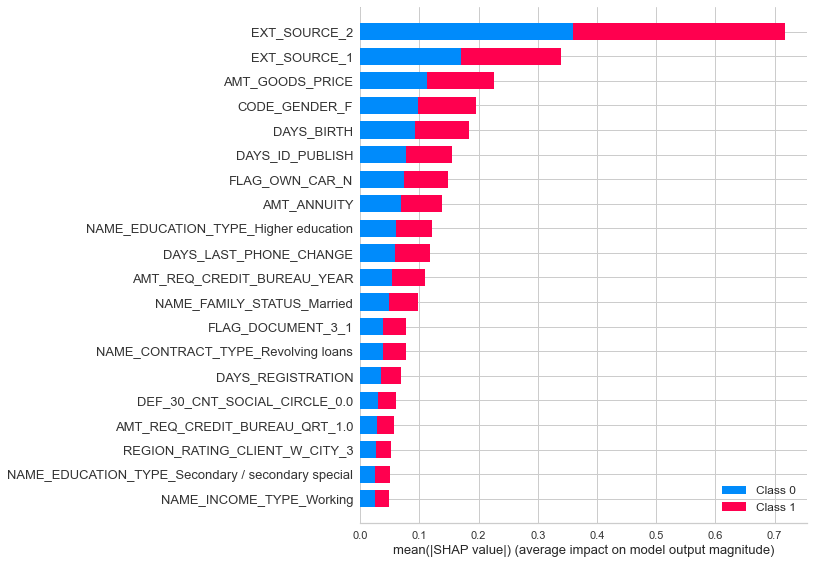

In [108]:
interpret_model(lgbm)

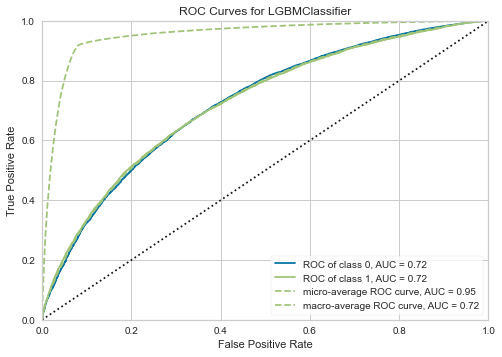

In [109]:
plot_model(lgbm)

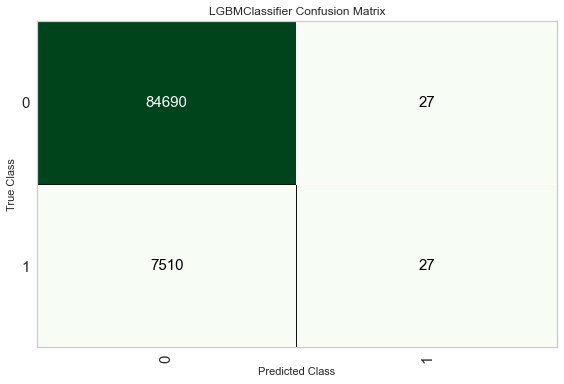

In [110]:
plot_model(lgbm, plot='confusion_matrix')

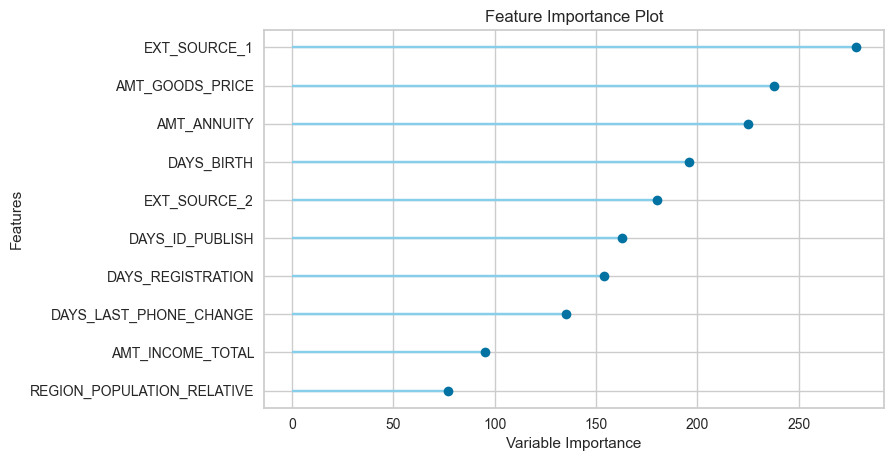

In [111]:
plot_model(lgbm, plot='feature')

In [158]:
importance = pd.DataFrame(models.feature_importances_, index=exp[0].columns, columns=['importance'])
importance.sort_values('importance', ascending=False)

,importance
EXT_SOURCE_1,229
EXT_SOURCE_3,209
EXT_SOURCE_2,182
DAYS_BIRTH,166
AMT_CREDIT,163
AMT_ANNUITY,139
DAYS_ID_PUBLISH,123
AMT_GOODS_PRICE,112
DAYS_REGISTRATION,112
DAYS_LAST_PHONE_CHANGE,103


In [168]:
features = list(importance.sort_values('importance', ascending=False).index[:20])

In [169]:
set(features) - set(train.columns)

{'CODE_GENDER_F',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_FAMILY_STATUS_Married'}

In [170]:
features.remove('CODE_GENDER_F')
features.remove('NAME_CONTRACT_TYPE_Cash loans')
features.remove('NAME_EDUCATION_TYPE_Higher education')
features.remove('NAME_FAMILY_STATUS_Married')

In [171]:
features.extend(['CODE_GENDER',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS'])

In [172]:
features

['EXT_SOURCE_1',
 'EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'DAYS_ID_PUBLISH',
 'AMT_GOODS_PRICE',
 'DAYS_REGISTRATION',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'OWN_CAR_AGE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'HOUR_APPR_PROCESS_START',
 'TOTALAREA_MODE',
 'CODE_GENDER',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS']